# Data Analysis Examples

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rc = {"figure.figsize" : (14, 6)}
sns.set(rc = rc)
my_palette = sns.color_palette("husl", 4)
sns.set_palette(my_palette)
sns.set_style("whitegrid")

## USA.gov data

### Load the dataset
Use the `json` module to load the data

In [4]:
path = "datasets/bitly_usagov/example.txt"

In [5]:
import json

In [6]:
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Count the number of timezones with pandas

In [7]:
df = pd.DataFrame(records)
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [9]:
df["tz"][:10].value_counts()

America/New_York     4
                     3
Europe/Warsaw        1
America/Denver       1
America/Sao_Paulo    1
Name: tz, dtype: int64

In [10]:
clean_tz = df["tz"].fillna("Missing")

In [11]:
clean_tz[clean_tz == ""] = "Unknown"

In [12]:
clean_tz.head(n = 20)

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                 Unknown
8                 Unknown
9                 Unknown
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                Missing
14       America/New_York
15         Asia/Hong_Kong
16         Asia/Hong_Kong
17       America/New_York
18         America/Denver
19            Europe/Rome
Name: tz, dtype: object

In [13]:
clean_tz[:20].value_counts()

America/New_York       8
Unknown                3
America/Denver         2
Asia/Hong_Kong         2
Missing                1
America/Los_Angeles    1
Europe/Rome            1
America/Sao_Paulo      1
Europe/Warsaw          1
Name: tz, dtype: int64

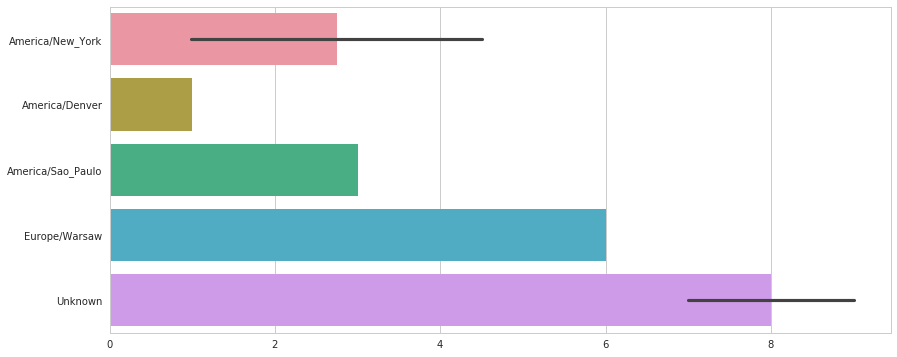

In [14]:
sns.barplot(y = clean_tz[:10].values, x = clean_tz[:10].index)

## MovieLens data

In [15]:
# Make display smaller
pd.options.display.max_rows = 15
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',header=None, names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',header=None, names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',header=None, names=mnames)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [16]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [17]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [18]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
first_merge = pd.merge(ratings, users, on = "user_id")
first_merge.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [20]:
second_merge = pd.merge(first_merge, movies, on = "movie_id")
second_merge.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [21]:
second_merge.shape

(1000209, 10)

In [22]:
df = second_merge

In [23]:
df.groupby(["gender", "title"])[["rating"]].agg("mean")

rating
gender title                                               
F      $1,000,000 Duck (1971)                      3.375000
       'Night Mother (1986)                        3.388889
       'Til There Was You (1997)                   2.675676
       'burbs, The (1989)                          2.793478
       ...And Justice for All (1979)               3.828571
       1-900 (1994)                                2.000000
       10 Things I Hate About You (1999)           3.646552
...                                                     ...
M      Your Friends and Neighbors (1998)           3.536585
       Zachariah (1971)                            3.500000
       Zed & Two Noughts, A (1985)                 3.380952
       Zero Effect (1998)                          3.723140
       Zero Kelvin (Kj�rlighetens kj�tere) (1995)  3.500000
       Zeus and Roxanne (1997)                     2.357143
       eXistenZ (1999)                             3.289086

[7152 rows x 1 columns]

In [24]:
df.pivot_table("rating", index = "title", columns = "gender")

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
...,...,...
Your Friends and Neighbors (1998),2.888889,3.536585


In [25]:
avg = df.pivot_table("rating", index = "title", columns = "gender", aggfunc = "mean")
avg

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
...,...,...
Your Friends and Neighbors (1998),2.888889,3.536585


In [26]:
ratings_by_title = df.groupby("title")[["title"]].count()
ratings_by_title

,title
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
1-900 (1994),2
10 Things I Hate About You (1999),700
...,...
Your Friends and Neighbors (1998),109


In [27]:
ratings_2500 = ratings_by_title.index[ratings_by_title.title >= 2500]
ratings_2500

Index(['American Beauty (1999)', 'Back to the Future (1985)', 'Fargo (1996)',
       'Jurassic Park (1993)', 'Matrix, The (1999)', 'Men in Black (1997)',
       'Raiders of the Lost Ark (1981)', 'Saving Private Ryan (1998)',
       'Silence of the Lambs, The (1991)',
       'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Terminator 2: Judgment Day (1991)'],
      dtype='object', name='title')

In [28]:
avg.loc[ratings_2500]

gender,F,M
title,,
American Beauty (1999),4.238901,4.347301
Back to the Future (1985),3.932707,4.009259
Fargo (1996),4.217656,4.267780
Jurassic Park (1993),3.579407,3.814197
"Matrix, The (1999)",4.128405,4.362235
Men in Black (1997),3.817844,3.719000
Raiders of the Lost Ark (1981),4.332168,4.520597
Saving Private Ryan (1998),4.114783,4.398941
"Silence of the Lambs, The (1991)",4.271955,4.381944


In [35]:
sorted_titles = avg.sort_values(ascending = False, by = "F")
sorted_titles

gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
Lamerica (1994),5.0,4.666667
"Gambler, The (A J�t�kos) (1997)",5.0,3.166667
...,...,...
Wings of Courage (1995),NaN,3.000000


In [39]:
avg["mean_diff"] = np.abs(avg.F - avg.M)

In [40]:
avg

gender,F,M,mean_diff
title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,0.613095
'Night Mother (1986),3.388889,3.352941,0.035948
'Til There Was You (1997),2.675676,2.733333,0.057658
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,0.139547
1-900 (1994),2.000000,3.000000,1.000000
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
...,...,...,...
Your Friends and Neighbors (1998),2.888889,3.536585,0.647696


In [43]:
avg.sort_values(by = "mean_diff", ascending = False).dropna()

gender,F,M,mean_diff
title,,,
Tigrero: A Film That Was Never Made (1994),1.000000,4.333333,3.333333
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
"Neon Bible, The (1995)",1.000000,4.000000,3.000000
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
"Enfer, L' (1994)",1.000000,3.750000,2.750000
Babyfever (1994),3.666667,1.000000,2.666667
...,...,...,...
Santa with Muscles (1996),1.000000,1.000000,0.000000
